d:\PROJECT\SIB DBS FOUNDATION\submission klasifikasi gambar rev3\submissionFiqi\.env39\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Input shape: [  1 150 150   1], dtype: <class 'numpy.float32'>


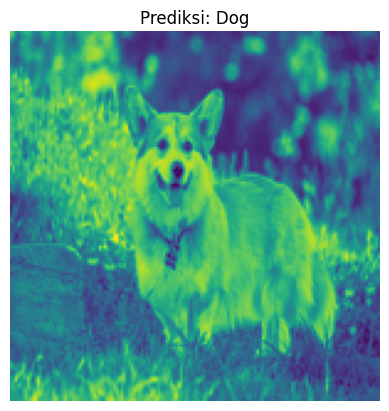

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Muat model TFLite
interpreter = tf.lite.Interpreter(model_path="tflite_model/model.tflite")
interpreter.allocate_tensors()

# Ambil detail input/output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Dapatkan shape & tipe input
input_shape = input_details[0]['shape']      # Contoh: [1, 150, 150, 3]
input_dtype = input_details[0]['dtype']
height, width = input_shape[1], input_shape[2]
channels = input_shape[3]

print(f"Input shape: {input_shape}, dtype: {input_dtype}")

# Fungsi untuk memuat dan memproses gambar
def load_image(img_path, target_size=(150, 150), channels=3):
    mode = 'RGB' if channels == 3 else 'L'
    img = Image.open(img_path).convert(mode)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalisasi
    if channels == 1:
        img_array = np.expand_dims(img_array, axis=-1)
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32)
    return img, img_array

# Ganti dengan path gambar kamu
img_path = "google dog.jpg"
img, input_data = load_image(img_path, target_size=(width, height), channels=channels)

# Masukkan data ke model
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Ambil hasil prediksi
output_data = interpreter.get_tensor(output_details[0]['index'])

# Interpretasi hasil (sigmoid vs softmax)
if output_data.shape[-1] == 1:
    predicted_class = int(output_data[0][0] > 0.5)
else:
    predicted_class = np.argmax(output_data)

# Label prediksi (urutan harus sesuai labels.txt)
labels = ["Cat", "Dog"]
hasil_prediksi = labels[predicted_class]

# Tampilkan gambar dan hasil
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediksi: {hasil_prediksi}")
plt.show()